In [1]:
import json
from StringIO import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
listings = pd.read_csv('Datasources/listings_augmented/listings_augmented_2018-05-23_V5.csv', low_memory = False)
listings = listings.drop(listings.index[4216:4219])

In [3]:
listings = listings.drop('distance_from_ocean', axis = 1)

In [4]:
contour_list = [(-117.12542727272728, 32.50603636363636),(-117.1239, 32.52068181818182),(-117.12237272727273, 32.53532727272727),(-117.12785, 32.550577272727274),
 (-117.13332727272727, 32.565827272727276),(-117.14155757575757, 32.58140454545455),(-117.14978787878788, 32.59698181818182),(-117.15801818181818, 32.61255909090909),
 (-117.14722727272728, 32.6186),(-117.13142727272728, 32.61995454545455), (-117.11562727272728, 32.621309090909094),(-117.16624848484848, 32.628136363636365),(-117.11614090909092, 32.6319),
 (-117.15394090909092, 32.632684090909095),(-117.11665454545455, 32.64249090909091),(-117.17447878787878, 32.643713636363636),(-117.16065454545455, 32.64676818181818),(-117.12490000000001, 32.6552),
 (-117.2549909090909, 32.65713636363636),(-117.18270909090909, 32.659290909090906), (-117.16736818181818, 32.66085227272727),(-117.24204545454546, 32.66253636363636),
 (-117.19277575757576, 32.66720303030303),(-117.13314545454546, 32.66790909090909),(-117.26173636363637, 32.67278181818182),(-117.24129545454545, 32.673590909090905),
 (-117.17408181818182, 32.67493636363636),(-117.20284242424242, 32.67511515151515),(-117.14139090909092, 32.68061818181818), (-117.2129090909091, 32.68302727272727),(-117.24054545454545, 32.68464545454545),
 (-117.18729545454545, 32.686263636363634), (-117.26848181818183, 32.688427272727274), (-117.15354363636364, 32.690034545454544),
 (-117.21238181818183, 32.69705454545455), (-117.2005090909091, 32.69759090909091), (-117.26729545454546, 32.698513636363636),
 (-117.16569636363637, 32.699450909090906), (-117.23467727272728, 32.700131818181816), (-117.2661090909091, 32.7086),
 (-117.17784909090909, 32.708867272727275), (-117.2288090909091, 32.71561818181818), (-117.19000181818183, 32.71828363636364),
 (-117.21548181818181, 32.721659090909085), (-117.26427272727273, 32.72405454545454), (-117.20215454545455, 32.7277), (-117.26243636363637, 32.73950909090909),
 (-117.26060000000001, 32.754963636363634), (-117.25876363636364, 32.77041818181818), (-117.26415909090909, 32.78511818181818),
 (-117.26955454545455, 32.79981818181818), (-117.27495, 32.81451818181819), (-117.28034545454545, 32.829218181818185), (-117.27120303030303, 32.83975454545455),
 (-117.26206060606061, 32.85029090909091), (-117.25291818181819, 32.86082727272727), (-117.24906363636364, 32.87129090909091),
 (-117.24953181818182, 32.88050454545454), (-117.25, 32.88971818181818), (-117.25397272727272, 32.90718909090909), (-117.25794545454545, 32.92466),
 (-117.26191818181819, 32.942130909090906), (-117.26589090909091, 32.95960181818182), (-117.26986363636364, 32.97707272727273),
 (-117.27609772727273, 32.993097727272726), (-117.28233181818182, 33.009122727272725), (-117.2885659090909, 33.025147727272724),
 (-117.29480000000001, 33.04117272727272), (-117.3010340909091, 33.05719772727273), (-117.30726818181819, 33.07322272727273), (-117.31350227272728, 33.08924772727273)]

In [5]:
def search_for_min_index(L, x):
    B = []
    count = 0
    for i, j in L:
        b = abs(j - x)
        B.append((count, b))
        count = count + 1
        
    B = sorted(B, key = lambda x: x[1])
    return (B[0][0], B[1][0])
        

In [6]:
#SANKARSHAN 5/26
lst2 = []
for i,k in zip(listings['latitude'],listings['longitude']):
    j_one, j_two = search_for_min_index(contour_list, i)
    val_one_i, val_one_ii = contour_list[j_one]
    val_two_i, val_two_ii = contour_list[j_two]
    val_ii_max = max(val_one_ii, val_two_ii)
    val_ii_min = min(val_one_ii, val_two_ii)
    rat = (i - val_ii_min)/val_ii_max
    val_i_max = max(val_one_i, val_two_i)
    val_i_min = min(val_one_i, val_two_i)
    val_i = val_i_min*rat + val_i_max*(1 - rat)
    
    lon_diff = (float(k) - val_one_i)*np.pi/180
    lat_diff = (float(i) - val_one_ii)*np.pi/180
    a = np.sin(lat_diff/2)**2 + np.cos(float(i)*np.pi/180)*np.cos(val_one_ii*np.pi/180)*(np.sin(lon_diff/2)**2)
    c_one = np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d_one = 6371.00*float(c_one)
    
    lon_diff = (float(k) - val_two_i)*np.pi/180
    lat_diff = (float(i) - val_two_ii)*np.pi/180
    a = np.sin(lat_diff/2)**2 + np.cos(float(i)*np.pi/180)*np.cos(val_two_ii*np.pi/180)*(np.sin(lon_diff/2)**2)
    c_two = np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    d_two = 6371.00*float(c_two)
    
    #lon_diff = (float(k) - val_i)*np.pi/180
    #a = (np.cos(float(i)*np.pi/180)**2)*(np.sin(lon_diff/2)**2)
    #c_three = np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    #d_three = 6371.00*float(c_three)
    #d = min(d_one, d_two, d_three)
    
    d = min(d_one, d_two)
    
    lst2.append(d)

listings['distance_from_ocean'] = lst2

In [7]:
min(lst2), max(lst2)

(0.012457704057860472, 12.266332986019895)

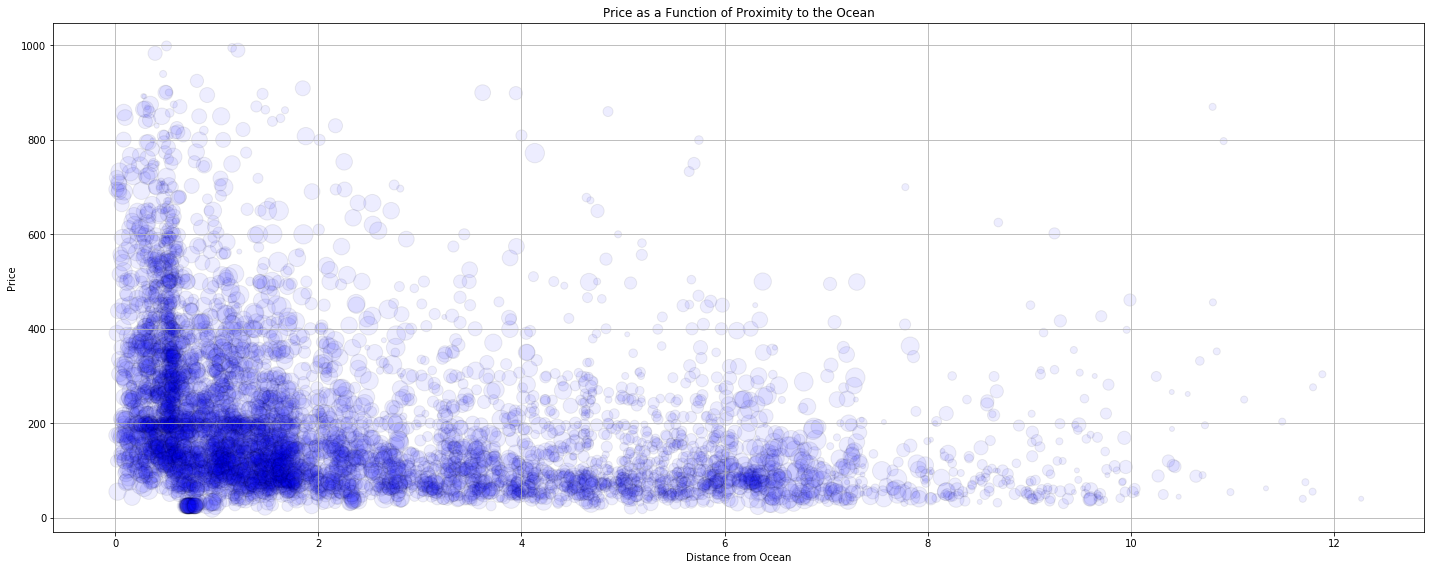

In [34]:
fig, ax = plt.subplots(figsize = (20, 8))
l = ax.scatter(listings['distance_from_ocean'], listings['price_y'],
              alpha = 0.07, c = 'b', marker = 'o',linewidth=1,edgecolor='black', 
               s=listings.park_count_1km*25)
#a, b = listings_augmented_2018['distance_from_ocean'].max(), listings_augmented_2018['price_y'].max()
ax.set_xlabel('Distance from Ocean')
ax.set_ylabel('Price')
ax.set_title('Price as a Function of Proximity to the Ocean')
fig.tight_layout(pad=1)
ax.grid(True)
plt.show()

In [27]:
def map_variable(df, var):
    fig, ax = plt.subplots(figsize=(19,8))
    plt.scatter(df['longitude'],df['latitude'],
                c=df[var], cmap='Oranges', alpha=.5, linewidth=1,edgecolor='black')
    plt.colorbar()
    plt.show()

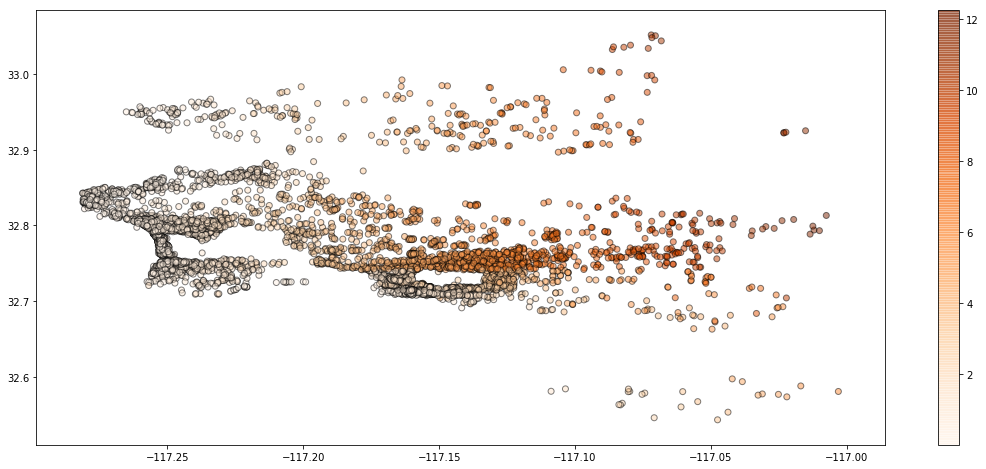

In [28]:
map_variable(listings, 'distance_from_ocean')